🧠 **Heart Disease Prediction - 2020 CDC Dataset**
📌 **Veri Seti Hakkında**
Bu proje, ABD Hastalık Kontrol ve Önleme Merkezi (CDC) tarafından yürütülen Behavioral Risk Factor Surveillance System (BRFSS) kapsamında 2020 yılında toplanan verilere dayanmaktadır. BRFSS, ABD'deki yetişkin bireylerin sağlıkla ilgili alışkanlıklarını ve durumlarını yıllık olarak sorgulayan dünyanın en büyük sürekli sağlık anket sistemidir.

Bu çalışmada kullanılan veri kümesi, CDC'nin **2020** yılına ait versiyonudur. Daha güncel olan 2022 veya 2023 verilerinden farklı olarak, bu versiyon ön işlemden geçmiş ve eksik veriler temizlenmiş haldedir.

Kalp hastalığı, özellikle Amerika Birleşik Devletleri'nde, tüm ırklarda önde gelen ölüm nedenlerinden biridir. CDC'ye göre Amerikalıların yaklaşık **%47’si** kalp hastalığına yol açabilecek üç ana risk faktöründen en az birine sahiptir:

Yüksek tansiyon

Yüksek kolesterol

Sigara kullanımı

Ek olarak, aşağıdaki değişkenler de kalp hastalığı ile yakından ilişkilidir:

Diyabet

Yüksek BMI (obezite)

Yetersiz fiziksel aktivite

Aşırı alkol tüketimi

🔍 **Hedef (Goal)**

Bu çalışmanın amacı, bireylerin sahip olduğu sağlık alışkanlıkları, sağlık durumu ve demografik bilgileri kullanarak kalp hastalığı riskini sınıflandırmaktır. Özellikle:

Veri keşfi (EDA) ile önemli değişkenlerin analiz edilmesi

Özellik mühendisliği teknikleri ile veri setinin zenginleştirilmesi

Farklı makine öğrenmesi modelleri ile karşılaştırmalı analiz yapılması

En yüksek başarıyı veren modelin belirlenmesi

In [1]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, f1_score, recall_score

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Veri Yükleme
df = pd.read_csv('/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv')

In [3]:
# Kategorik Olan Hedef Değişkeni Sayısal Değişkene Dönüştürme
df['HeartDisease'] = df['HeartDisease'].map({'Yes': 1, 'No': 0})

In [4]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,0,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,0,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


df.head() fonksiyonu ile ilk **5** satırı ve **18** sütunun tamamını görüntülüyoruz.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

📊 **Veri Seti Genel Görünüm**

Veri setinde **17** adet orijinal sütun, hedef değişken olarak **HeartDisease** sütunu ve 319795 veri bulunmaktadır. Veride eksik değer bulunmamaktadır. 

**Bazı önemli sütunlar:**

***BMI:*** Vücut kitle indeksi

***Smoking:*** Sigara içme durumu

***AlcoholDrinking:*** Alkol kullanma durumu

***Stroke:*** Felç geçirme durumu

***PhysicalHealth / MentalHealth:*** Kötü sağlık gün sayısı

***Sex, AgeCategory, Race:*** Demografik bilgiler

***Diabetic, PhysicalActivity, Asthma, KidneyDisease, SkinCancer:*** Sağlık geçmişi

In [6]:
df.describe()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000
mean,0.085595,28.325399,3.37171,3.898366,7.097075
std,0.279766,6.356100,7.95085,7.955235,1.436007
min,0.000000,12.020000,0.00000,0.000000,1.000000
25%,0.000000,24.030000,0.00000,0.000000,6.000000
50%,0.000000,27.340000,0.00000,0.000000,7.000000
75%,0.000000,31.420000,2.00000,3.000000,8.000000
max,1.000000,94.850000,30.00000,30.000000,24.000000


## 1. **HeartDisease (Kalp Hastalığı)**
- **Ortalama (Mean):** `0.085`  
  - Popülasyonun **%8.5'inde kalp hastalığı** tanısı mevcut.
- **Standart Sapma (Std):** `0.279`  
  - Değişken **ikili (binary)** olduğundan düşük sapma beklenen bir durum.
- **Çeyreklikler (25%, 50%, 75%):** `0`  
  - Veri setinin **büyük çoğunluğu kalp hastalığı taşımıyor**. Bu, dengesiz (imbalanced) bir dağılıma işaret ediyor.

---

## 2. **BMI (Vücut Kitle İndeksi)**
- **Ortalama:** `28.32`  
  - Ortalama BMI **"fazla kilolu"** aralığında (25-30). Genel popülasyon kilo problemi eğilimli.
- **Standart Sapma:** `6.35`  
  - BMI değerleri orta düzeyde dağılım gösteriyor.
- **Min-Max Değerleri:** `12.02 - 94.85`  
  - **Aykırı değerler mevcut** (özellikle 94.85 gibi gerçekçi olmayan BMI). Veri temizliği veya normalizasyon önerilir.

---

## 3. **PhysicalHealth & MentalHealth (Fiziksel/Zihinsel Sağlık)**
- **Ortalama (Physical):** `3.37`, **Mental:** `3.89`  
  - Son 30 günde ortalama **3-4 gün** fiziksel/zihinsel sağlık sorunu yaşanmış.
- **Standart Sapma:** `~7.95`  
  - Büyük sapma, bazı bireylerde **aşırı yüksek değerler** (max=30) olduğunu gösteriyor.
- **Çeyreklikler:**  
  - **%75'lik dilimde PhysicalHealth ≤2**, MentalHealth ≤3. Çoğunluk hafif sorunlar bildirmiş.

---

## 4. **SleepTime (Uyku Süresi)**
- **Ortalama:** `7.09 saat`  
  - Genel uyku süresi **sağlıklı aralıkta** (7-9 saat).
- **Standart Sapma:** `1.43`  
  - Dağılım nispeten dar, çoğunluk ortalamaya yakın.
- **Min-Max Değerleri:** `1 - 24 saat`  
  - **1 saat uyku** gerçekçi değil; **24 saat** ise imkânsız. Aykırı değerlerin incelenmesi gerekiyor.

---

## **Genel Çıkarımlar**
1. **Dengesiz Sınıf Dağılımı:** Kalp hastalığı olanlar azınlıkta. Modellemede **oversampling/undersampling** teknikleri kullanılmalı.
2. **Aykırı Değerler:** BMI ve SleepTime'da şüpheli değerler mevcut. Veri kalitesi için **temizleme** şart.
3. **Korelasyon İhtimali:** Yüksek BMI ile kalp hastalığı arasında ilişki olabilir. İleri analizlerle test edilmeli.
4. **Sağlık Metrikleri:** Fiziksel/zihinsel sağlık günleri, kronik sorunları olan bireyleri işaret ediyor olabilir.


In [7]:
# Eksik Verilerin İncelenmesi
print(df.isnull().sum())

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


Veri setinde **18** sütunun hepsinde eksik veri sayısının **sıfır(0)** olduğu görülmektedir.

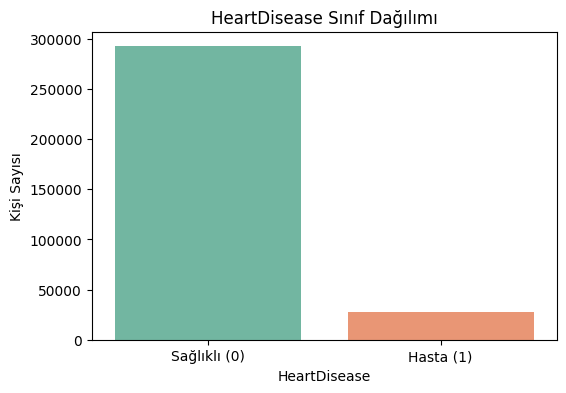

In [8]:
# GRAFİK 1: Sınıf Dağılımı
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='HeartDisease', palette='Set2')
plt.title("HeartDisease Sınıf Dağılımı")
plt.xticks([0, 1], ['Sağlıklı (0)', 'Hasta (1)'])
plt.ylabel("Kişi Sayısı")
plt.show()

📈 **Keşifsel Veri Analizi (EDA):** 

**Sınıf Dağılımı**
Veri seti dengesizdir. **"HeartDisease"** sütununda hasta olan bireyler **(1)** sayıca azınlıktadır. Bu nedenle modelleme aşamasında **class_weight, scale_pos_weight** gibi dengeleme stratejileri uygulanmıştır.

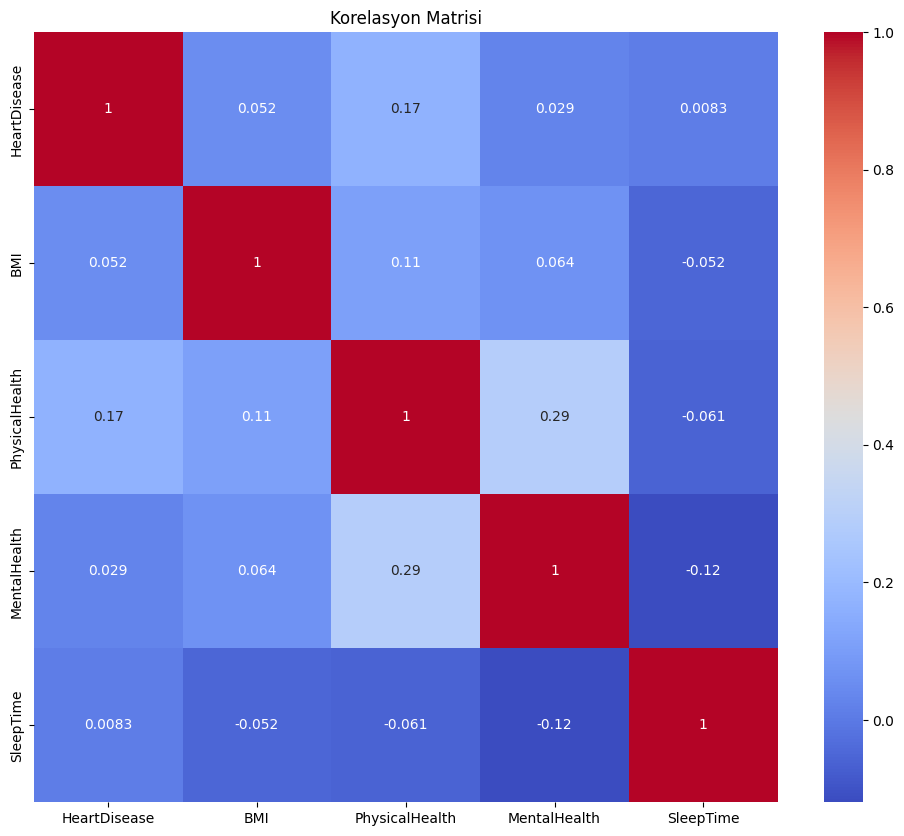

In [9]:
# Korelasyon Matrisi (Sadece sayısal değişkenler için)
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasyon Matrisi")
plt.show()

📊 **Korelasyon Matrisi:** 
Bu grafik, kalp hastalığı (HeartDisease) ve bazı sağlık göstergeleri (BMI, PhysicalHealth, MentalHealth, SleepTime, UnhealthyScore) arasındaki korelasyon katsayılarını gösterir.

**Dikkat Çeken Noktalar:**
**HeartDisease ile Korelasyonlar:**

*PhysicalHealth:* **0.17** → Pozitif ama zayıf bir ilişki.

*MentalHealth:* **0.029** → Çok zayıf pozitif ilişki.

*SleepTime:* **0.0083** → Korelasyon neredeyse yok.

*UnhealthyScore:* **0.12** → Hafif pozitif ilişki.

*BMI:* **0.052** → Zayıf pozitif ilişki.

**UnhealthyScore ile Diğer Değişkenler:**

*PhysicalHealth & MentalHealth:* 0.8 → Çok güçlü pozitif korelasyon. UnhealthyScore bu iki değişkeni birleştirerek hesaplandığı için beklenen bir durum.

**Sonuç:**

Kalp hastalığıyla ilişkili değişkenler arasında en yüksek korelasyon PhysicalHealth **(0.17)** ile olup, bu da zayıf düzeydedir.

Korelasyonlar genel olarak düşüktür; bu da kalp hastalığını tahmin etmek için daha karmaşık modellerin gerektiğini ve belki de dolaylı etkileşimlerin incelenmesini önerir.



In [10]:
# Özellik Mühendisliği

# AgeGroup
def age_group(age):
    if age in ['18-24', '25-29', '30-34']: return 'Young'
    elif age in ['35-39', '40-44', '45-49']: return 'MidAge'
    elif age in ['50-54', '55-59', '60-64']: return 'Senior'
    else: return 'Elder'
df['AgeGroup'] = df['AgeCategory'].apply(age_group)

# RiskyLifestyle
df['RiskyLifestyle'] = np.where(
    (df['AlcoholDrinking'] == 'Yes') & (df['PhysicalActivity'] == 'No'),
    'Yes', 'No'
)

# BMI_Category
def bmi_cat(bmi):
    if bmi < 18.5: return 'Underweight'
    elif 18.5 <= bmi < 25: return 'Normal'
    elif 25 <= bmi < 30: return 'Overweight'
    else: return 'Obese'
df['BMI_Category'] = df['BMI'].apply(bmi_cat)

# UnhealthyScore (mental + physical health days)
df['UnhealthyScore'] = (df['PhysicalHealth'] + df['MentalHealth']) / 2 if 'PhysicalHealth' in df.columns and 'MentalHealth' in df.columns else 0



🛠 **Özellik Mühendisliği:**

Veri setini zenginleştirmek ve model performansını artırmak amacıyla şu yeni değişkenler oluşturulmuştur:

**AgeGroup:** Yaş aralıkları genç, orta, yaşlı ve çok yaşlı olarak gruplanmıştır.

**RiskyLifestyle:** Alkol kullanıp fiziksel aktivitesi olmayan bireyler “riskli yaşam tarzı”na sahip olarak etiketlenmiştir.

**BMI_Category:** BMI değeri 4 kategoride sınıflandırılmıştır (Underweight, Normal, Overweight, Obese).

**UnhealthyScore:** Fiziksel ve mental kötü günlerin ortalaması alınarak oluşturulmuştur.



In [11]:
# One-Hot Encoding
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'HeartDisease' in categorical_cols:
    categorical_cols.remove('HeartDisease')
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [12]:
# Özellik ve Hedef Ayır
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

In [13]:
# Eğitim ve Test Verisi
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


🔄 Ön İşleme ve Modelleme
🧪 Modelleme Aşamaları
Veriler eğitim ve test olarak ayrılmıştır (%80 - %20)

Sayısal değişkenler StandardScaler ile ölçeklenmiştir.

Kategorik değişkenler One-Hot Encoding ile dönüştürülmüştür.

3 farklı makine öğrenmesi algoritması denenmiştir:

Random Forest

XGBoost

LightGBM

Her model için hiperparametre optimizasyonu GridSearchCV ile yapılmıştır.

In [14]:
# Random Forest Modeli
param_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_rf, scoring='f1', cv=3, n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)
rf_best = grid_rf.best_estimator_
y_pred_rf = rf_best.predict(X_test_scaled)

In [15]:
# XGBoost
param_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'scale_pos_weight': [10]
}
grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                        param_xgb, scoring='f1', cv=3, n_jobs=-1)
grid_xgb.fit(X_train_scaled, y_train)
xgb_best = grid_xgb.best_estimator_
y_pred_xgb = xgb_best.predict(X_test_scaled)

In [16]:
# LightGBM
param_lgb = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'learning_rate': [0.01, 0.1],
    'class_weight': ['balanced']
}
grid_lgb = GridSearchCV(LGBMClassifier(random_state=42), param_lgb, scoring='f1', cv=3, n_jobs=2)
grid_lgb.fit(X_train_scaled, y_train)
lgb_best = grid_lgb.best_estimator_
y_pred_lgb = lgb_best.predict(X_test_scaled)

[LightGBM] [Info] Number of positive: 21898, number of negative: 233938
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 524
[LightGBM] [Info] Number of data points in the train set: 255836, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


✅ Model Performansı
Her model için Accuracy, Recall ve F1-score değerleri hesaplanmıştır. Özellikle Recall skoru hasta bireyleri doğru tahmin etme başarısını gösterdiği için öncelikli olarak değerlendirilmiştir.

In [17]:
# Performans Karşılaştırması
print("Random Forest:\n", classification_report(y_test, y_pred_rf))
print("XGBoost:\n", classification_report(y_test, y_pred_xgb))
print("LightGBM:\n", classification_report(y_test, y_pred_lgb))

Random Forest:
               precision    recall  f1-score   support

           0       0.95      0.85      0.90     58484
           1       0.26      0.56      0.35      5475

    accuracy                           0.83     63959
   macro avg       0.61      0.70      0.63     63959
weighted avg       0.89      0.83      0.85     63959

XGBoost:
               precision    recall  f1-score   support

           0       0.97      0.75      0.85     58484
           1       0.23      0.76      0.35      5475

    accuracy                           0.75     63959
   macro avg       0.60      0.76      0.60     63959
weighted avg       0.91      0.75      0.81     63959

LightGBM:
               precision    recall  f1-score   support

           0       0.97      0.73      0.84     58484
           1       0.22      0.79      0.34      5475

    accuracy                           0.74     63959
   macro avg       0.60      0.76      0.59     63959
weighted avg       0.91      0.74    

In [18]:
# Performans skorlarını hesapla
models = ['Random Forest', 'XGBoost', 'LightGBM']
recalls = [recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_xgb), recall_score(y_test, y_pred_lgb)]
f1s = [f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_xgb), f1_score(y_test, y_pred_lgb)]
accs = [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_xgb), accuracy_score(y_test, y_pred_lgb)]

# Sonuçları yazdır
print("Recall Scores:", recalls)
print("F1 Scores:", f1s)
print("Accuracy Scores:", accs)

Recall Scores: [0.5565296803652968, 0.7647488584474886, 0.7936073059360731]
F1 Scores: [0.3530093263048138, 0.34788749948070297, 0.3428143122016647]
Accuracy Scores: [0.8253725042605419, 0.7545771509873512, 0.7395362654200347]


📊 Karşılaştırma Grafiği
Model performansları aşağıdaki gibi özetlenmiştir:

Accuracy: Genel doğruluk oranı

Recall: Pozitif sınıfı (hasta birey) yakalama oranı

F1-score: Precision ve Recall dengesinin harmonik ortalaması

🔍 Grafik 2: Model Performans Karşılaştırması
Bu grafikte, üç farklı makine öğrenimi modeli (Random Forest, XGBoost ve LightGBM) üzerinde accuracy (doğruluk), recall (duyarlılık) ve f1-score (f1 puanı) metrikleri karşılaştırılmıştır. Yorumlar:

Accuracy (Doğruluk):

En yüksek doğruluk değeri Random Forest modeline aittir (yaklaşık 0.83).

XGBoost ve LightGBM modelleri yaklaşık %75 doğruluk sağlamaktadır.

Recall (Duyarlılık):

En yüksek recall değeri LightGBM modelinde gözlemlenmektedir (~0.79).

Bu, LightGBM'in pozitif (kalp hastalığı olan bireyleri) sınıfını daha iyi tanımladığını gösterir.

F1-score:

Tüm modeller için f1-score düşük çıkmıştır (~0.34-0.36 arası).

Bu, sınıflar arası dengesizlik veya pozitif sınıfta zayıf performans kaynaklı olabilir.

Sonuç:
Accuracy açısından Random Forest önde olsa da, recall açısından LightGBM daha iyi sonuç vermektedir. Pozitif sınıfın doğru tahmini (kalp hastalığı) önemli olduğundan, LightGBM modeli recall açısından tercih edilebilir. Ancak genel f1-score'ların düşük olması, modeli iyileştirme veya veri dengesini ele alma gerekliliğini gösterir.

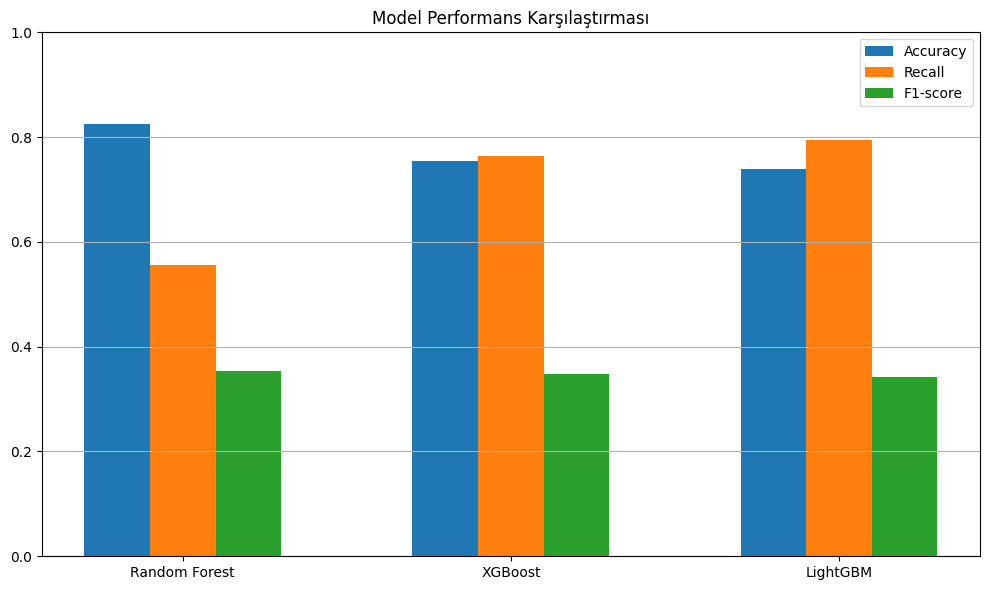

In [19]:
# GRAFİK 2: Performans Karşılaştırması
plt.figure(figsize=(10,6))
x = np.arange(len(models))
plt.bar(x-0.2, accs, width=0.2, label='Accuracy')
plt.bar(x, recalls, width=0.2, label='Recall')
plt.bar(x+0.2, f1s, width=0.2, label='F1-score')
plt.xticks(x, models)
plt.ylim(0,1)
plt.title("Model Performans Karşılaştırması")
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

⭐ En Önemli Özellikler (Feature Importance)
LightGBM modeline göre en etkili 10 değişken analiz edilmiştir. Bu değişkenler, modelin kalp hastalığı riskini tahmin ederken en çok dikkate aldığı faktörleri göstermektedir.

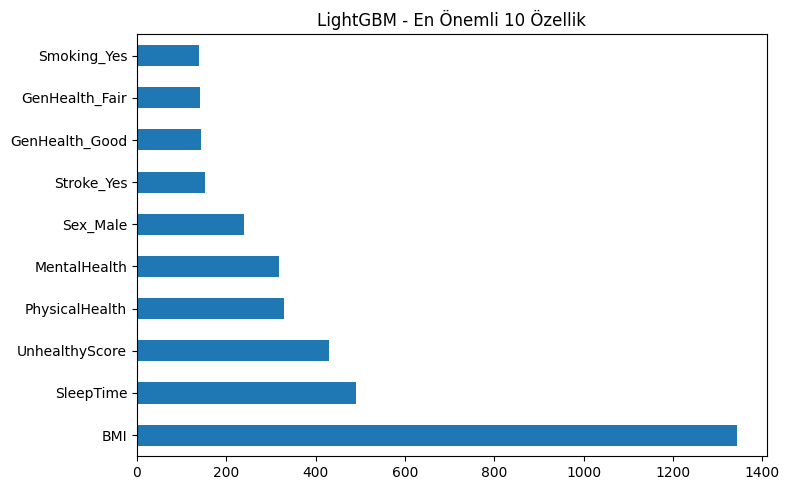

In [20]:
# Özellik Önemlilikleri (LightGBM ile örnek)
importances = pd.Series(lgb_best.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', figsize=(8, 5), title="LightGBM - En Önemli 10 Özellik")
plt.tight_layout()
plt.show()